In [37]:
import pandas as pd

data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [38]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


I will be forecasting weather for Bangkok, Thailand. I was born and brought up in this country, so this is a particularly important topic for me to investigate.

In [39]:
bangkok_data = data.loc[data['City'] == "Bangkok"]
bangkok_data['AverageTemperature']=bangkok_data.AverageTemperature.fillna(method='bfill')
bangkok_data['AverageTemperatureUncertainty']=bangkok_data.AverageTemperatureUncertainty.fillna(method='bfill')

/var/folders/qy/s1189m5j07xckfr1323yfrg00000gn/T/ipykernel_44870/3137699990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangkok_data['AverageTemperature']=bangkok_data.AverageTemperature.fillna(method='bfill')
/var/folders/qy/s1189m5j07xckfr1323yfrg00000gn/T/ipykernel_44870/3137699990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangkok_data['AverageTemperatureUncertainty']=bangkok_data.AverageTemperatureUncertainty.fillna(method='bfill')


In [40]:
bangkok_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
19948,1816-03-01,27.426,1.793,Bangkok,Thailand,13.66N,99.91E
19949,1816-04-01,28.349,3.011,Bangkok,Thailand,13.66N,99.91E
19950,1816-05-01,28.781,1.980,Bangkok,Thailand,13.66N,99.91E
19951,1816-06-01,27.197,1.823,Bangkok,Thailand,13.66N,99.91E
19952,1816-07-01,25.728,1.414,Bangkok,Thailand,13.66N,99.91E
...,...,...,...,...,...,...,...
22314,2013-05-01,30.927,0.504,Bangkok,Thailand,13.66N,99.91E
22315,2013-06-01,28.771,0.451,Bangkok,Thailand,13.66N,99.91E
22316,2013-07-01,28.155,0.308,Bangkok,Thailand,13.66N,99.91E
22317,2013-08-01,28.351,0.458,Bangkok,Thailand,13.66N,99.91E


In [41]:
bangkok_data = bangkok_data.reset_index()
bangkok_data = bangkok_data.drop(columns=['index'])
bangkok_data.dt = pd.to_datetime(bangkok_data.dt)

In [42]:
bangkok_data['Year'] = bangkok_data['dt'].dt.year
bangkok_data['Month'] = bangkok_data['dt'].dt.month


In [43]:
bangkok_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1816-03-01,27.426,1.793,Bangkok,Thailand,13.66N,99.91E,1816,3
1,1816-04-01,28.349,3.011,Bangkok,Thailand,13.66N,99.91E,1816,4
2,1816-05-01,28.781,1.980,Bangkok,Thailand,13.66N,99.91E,1816,5
3,1816-06-01,27.197,1.823,Bangkok,Thailand,13.66N,99.91E,1816,6
4,1816-07-01,25.728,1.414,Bangkok,Thailand,13.66N,99.91E,1816,7
...,...,...,...,...,...,...,...,...,...
2366,2013-05-01,30.927,0.504,Bangkok,Thailand,13.66N,99.91E,2013,5
2367,2013-06-01,28.771,0.451,Bangkok,Thailand,13.66N,99.91E,2013,6
2368,2013-07-01,28.155,0.308,Bangkok,Thailand,13.66N,99.91E,2013,7
2369,2013-08-01,28.351,0.458,Bangkok,Thailand,13.66N,99.91E,2013,8


To capture seasonal patterns in your weather data, you can plot the average temperature for each month over a specific timeframe. I am going to plot the average temperature of each month over my whole lifetime (2018-2023).

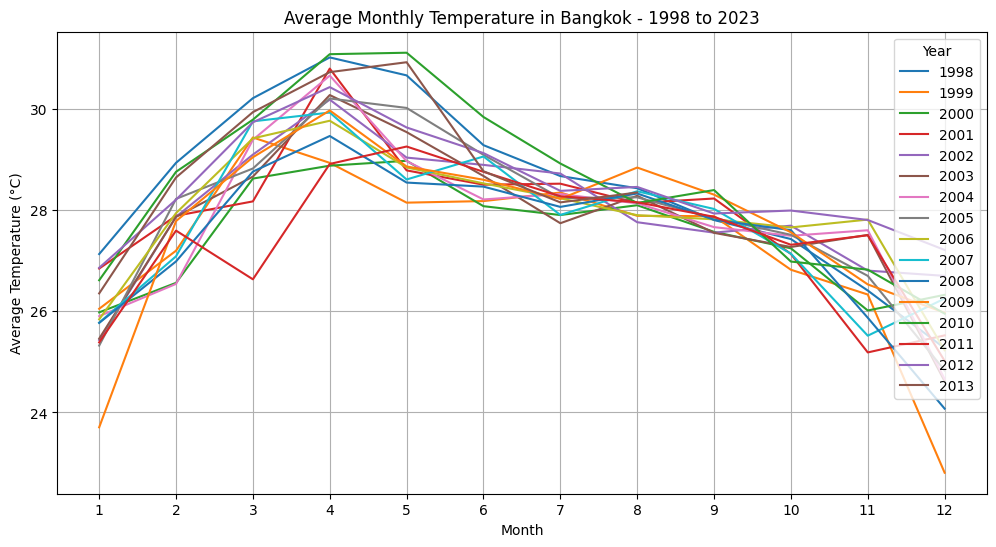

In [44]:
import matplotlib.pyplot as plt

# Filter the data for the desired range of years
start_year = 1998
end_year = 2023
year_range_data = bangkok_data[(bangkok_data['Year'] >= start_year) & (bangkok_data['Year'] <= end_year)]

# Group the data by year and month and calculate the average temperature for each month
monthly_avg_temperature = year_range_data.groupby(['Year', 'Month'])['AverageTemperature'].mean().unstack()

# Define the x-axis (months) and y-axis (average temperature)
months = monthly_avg_temperature.columns
years = monthly_avg_temperature.index
temperature = monthly_avg_temperature.values

# Create the plot
plt.figure(figsize=(12, 6))
for i, year in enumerate(years):
    plt.plot(months, temperature[i], label=str(year))

plt.title('Average Monthly Temperature in Bangkok - {} to {}'.format(start_year, end_year))
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')

# Display the plot
plt.show()


In [45]:
bangkok_data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'Year', 'Month'],
      dtype='object')

In [46]:
bangkok_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1816-03-01,27.426,1.793,Bangkok,Thailand,13.66N,99.91E,1816,3
1,1816-04-01,28.349,3.011,Bangkok,Thailand,13.66N,99.91E,1816,4
2,1816-05-01,28.781,1.980,Bangkok,Thailand,13.66N,99.91E,1816,5
3,1816-06-01,27.197,1.823,Bangkok,Thailand,13.66N,99.91E,1816,6
4,1816-07-01,25.728,1.414,Bangkok,Thailand,13.66N,99.91E,1816,7
...,...,...,...,...,...,...,...,...,...
2366,2013-05-01,30.927,0.504,Bangkok,Thailand,13.66N,99.91E,2013,5
2367,2013-06-01,28.771,0.451,Bangkok,Thailand,13.66N,99.91E,2013,6
2368,2013-07-01,28.155,0.308,Bangkok,Thailand,13.66N,99.91E,2013,7
2369,2013-08-01,28.351,0.458,Bangkok,Thailand,13.66N,99.91E,2013,8


/var/folders/qy/s1189m5j07xckfr1323yfrg00000gn/T/ipykernel_44870/2477772276.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['dt'] = pd.to_datetime(time_series_data['dt'])
/Users/samiesaheb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/samiesaheb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/samiesaheb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

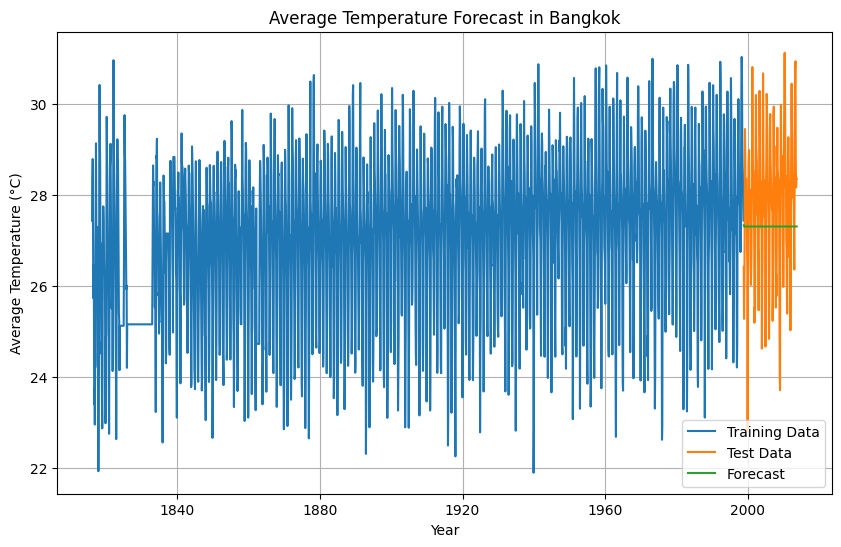

In [47]:
# !pip install statsmodels 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Filter the relevant columns for time series forecasting
time_series_data = bangkok_data[['dt', 'AverageTemperature']]

# Set the 'dt' column as the index and convert it to datetime format
time_series_data['dt'] = pd.to_datetime(time_series_data['dt'])
time_series_data = time_series_data.set_index('dt')

# Fill missing values with the previous non-null value
time_series_data['AverageTemperature'] = time_series_data['AverageTemperature'].fillna(method='ffill')

# Split the data into training and testing sets
train_data = time_series_data.loc[:'1998-10-01']
test_data = time_series_data.loc['1998-11-01':]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Perform forecasting
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plot the actual values and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['AverageTemperature'], label='Training Data')
plt.plot(test_data.index, test_data['AverageTemperature'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Average Temperature Forecast in Bangkok')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import numpy as np

# Calculate the forecasted values
forecast_values = model_fit.forecast(len(test_data))[0]

# Calculate the evaluation metrics
mae = np.mean(np.abs(forecast_values - test_data['AverageTemperature']))
mse = np.mean((forecast_values - test_data['AverageTemperature'])**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((forecast_values - test_data['AverageTemperature']) / test_data['AverageTemperature'])) * 100

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)


Mean Absolute Error (MAE): 1.2950570265901977
Mean Squared Error (MSE): 2.4833636284111793
Root Mean Squared Error (RMSE): 1.5758691660195587
Mean Absolute Percentage Error (MAPE): 4.63718918962497


# The ARIMA model was evaluated to assess its accuracy in forecasting the average temperature for Bangkok. 

- MAE (Mean Absolute Error): 1.30
- MSE (Mean Squared Error): 2.48
- RMSE (Root Mean Squared Error): 1.58
- MAPE (Mean Absolute Percentage Error): 4.64%